In [ ]:
#new

Training Experiment 1 (ReLU-ReLU-ReLU-ReLU-ReLU)
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.3853 - loss: 1.6772 - val_accuracy: 0.6044 - val_loss: 1.1038
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6398 - loss: 1.0079 - val_accuracy: 0.6897 - val_loss: 0.8876
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7255 - loss: 0.7826 - val_accuracy: 0.7306 - val_loss: 0.7783
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7882 - loss: 0.6085 - val_accuracy: 0.7453 - val_loss: 0.7494
Training Experiment 2 (Tanh-ReLU-ReLU-ReLU-Sigmoid)
782/782 ━━━━━━━━━━━━━━━━━━━━ 646s 824ms/step - accuracy: 0.3835 - loss: 1.6794 - val_accuracy: 0.6119 - val_loss: 1.1010
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6571 - loss: 0.9781 - val_accuracy: 0.7132 - val_loss: 0.8292
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.7532 - loss: 0.7162 - val_accuracy: 0.7239 - val_loss: 0.7985


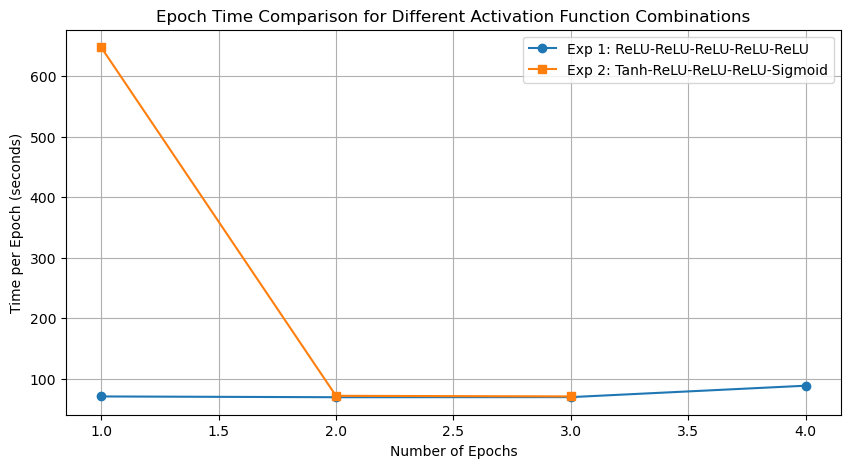

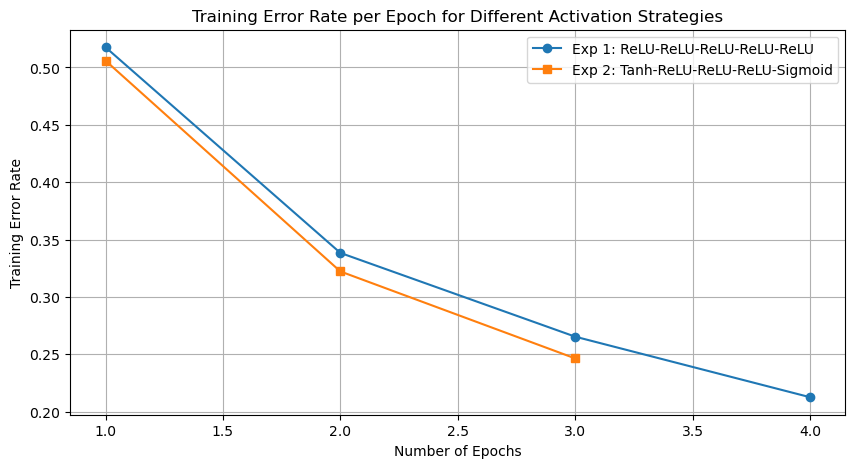

In [17]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading the CIFAR-10 dataset and preprocessing it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)  # One-hot encode labels

# Function to create CNN model with specified activations for convolution layers
def create_model(activations):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation=activations[0], padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),  

        tf.keras.layers.Conv2D(64, (3,3), activation=activations[1], padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),  

        tf.keras.layers.Conv2D(128, (3,3), activation=activations[2], padding='same'),
        tf.keras.layers.Conv2D(256, (3,3), activation=activations[3], padding='same'),  

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activations[4]),
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes # softmax is used as we have multiclass
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train model and record epoch times and training error
def train_model(activations):
    model = create_model(activations)
    train_error = 1.0  # Assigning initial error as 100%
    epoch_times = []
    train_errors = []  # this list is used to store training errors that we would require for plotting
    epoch = 0

    while train_error > 0.25:  # Train until training error is less than 25%, i.e., accuracy is greater than 75%
        start_time = time.time()
        history = model.fit(x_train, y_train, epochs=1, batch_size=64, verbose=1, validation_data=(x_test, y_test))
        end_time = time.time()
        
        epoch_times.append(end_time - start_time)
        train_error = 1 - history.history['accuracy'][0]  # Calculate training error
        train_errors.append(train_error)
        epoch += 1
    
    return epoch_times, train_errors

# Activation functions are defined here for two seperate experiments
experiment_1 = ['relu', 'relu', 'relu', 'relu', 'relu']
experiment_2 = ['tanh', 'relu', 'relu', 'relu', 'sigmoid']

# Training the two experiments seperately
print("Training Experiment 1 (ReLU-ReLU-ReLU-ReLU-ReLU)")
epoch_times_1, train_errors_1 = train_model(experiment_1)

print("Training Experiment 2 (Tanh-ReLU-ReLU-ReLU-Sigmoid)")
epoch_times_2, train_errors_2 = train_model(experiment_2)

# Plot Epoch vs. Time per Epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_times_1) + 1), epoch_times_1, label="Exp 1: ReLU-ReLU-ReLU-ReLU-ReLU", marker='o')
plt.plot(range(1, len(epoch_times_2) + 1), epoch_times_2, label="Exp 2: Tanh-ReLU-ReLU-ReLU-Sigmoid", marker='s')

plt.xlabel("Number of Epochs")
plt.ylabel("Time per Epoch (seconds)")
plt.title("Epoch Time Comparison for Different Activation Function Combinations")
plt.legend()
plt.grid()
plt.show()

# Plot Epoch vs. Training Error Rate
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_errors_1) + 1), train_errors_1, label="Exp 1: ReLU-ReLU-ReLU-ReLU-ReLU", marker='o')
plt.plot(range(1, len(train_errors_2) + 1), train_errors_2, label="Exp 2: Tanh-ReLU-ReLU-ReLU-Sigmoid", marker='s')

plt.xlabel("Number of Epochs")
plt.ylabel("Training Error Rate")
plt.title("Training Error Rate per Epoch for Different Activation Strategies")
plt.legend()
plt.grid()
plt.show()
